In [1]:
#efficient modular exponentiation function
#inputs: base, exponent, modulus
#outputs: new number
def mod_exp_r2l(b, e, m):
    if m==1:
        return 0
    result=1
    b = b % m
    while (e >0):
        if (e%2==1):
            result = (result * b) % m
        e >>=1
        b = (b*b) % m
    return result

In [2]:
import random
#Miller-Rabin algorithm
#inputs: integer
#outputs: inconclusive if possible prime, composite elsewise
def miller_rabin(n):
    k=1
    q=n-1
    while (q % 2 == 0) :
        k += 1
        q //= 2
        
    #up to here, we were just finding integers k and q
    a = random.randrange(2, n-1)
    if mod_exp_r2l(a, q, n) ==1:
        return 'inconclusive'

    for i in range(k):
        value = mod_exp_r2l(a, q * pow(2, i), n) + 1
        if  value==n:
            return 'inconclusive'
    return 'composite'

In [3]:
#primality test function
#input: integer
#output: integer
def primality_test(n):
    for i in range(20):
        if miller_rabin(n) == 'composite':
            return False
    return True

In [4]:
#prime generation function
#input integer
#output: integer
def prime_generation(n):
    n+=1
    while True:
        # print(n, end='\n')
        if primality_test(n) == True:
            return n
        n+=1

prime of 32 bits:  2147483659
prime of 64 bits:  9223372036854775837
prime of 128 bits:  170141183460469231731687303715884105757
prime of 256 bits:  115792089237316195423570985008687907853269984665640564039457584007913129640233


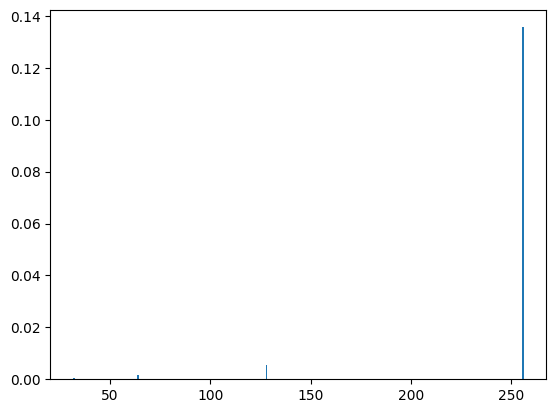

In [5]:
import matplotlib.pyplot as plt
import time

#time to find 32-bit prime
time_32_s = time.perf_counter()
bit_32 = pow(2,31)
print('prime of 32 bits: ', prime_generation(bit_32))
time_32_e = time.perf_counter()
time_32 = time_32_e - time_32_s

#time to find 64-bit prime
time_64_s = time.perf_counter()
bit_64 = pow(2,63)
print('prime of 64 bits: ', prime_generation(bit_64))
time_64_e = time.perf_counter()
time_64 = time_64_e - time_64_s

#time to find 128-bit prime
time_128_s = time.perf_counter()
bit_128 = pow(2,127)
print('prime of 128 bits: ', prime_generation(bit_128))
time_128_e = time.perf_counter()
time_128 = time_128_e - time_128_s

#time to find 256-bit prime
time_256_s = time.perf_counter()
bit_256 = pow(2, 256)
print('prime of 256 bits: ', prime_generation(bit_256))
time_256_e = time.perf_counter()
time_256 = time_256_e - time_256_s

times = [time_32, time_64, time_128, time_256]
bit_ammount = [32, 64, 128, 256]

plt.bar(bit_ammount, times)
plt.show()

In [6]:
import random
def prime_generation_rsa(n):
    n+=1
    skips = random.randrange(0, 10)
    while True:
        # print(n, end='\n')
        if primality_test(n) == True:
            if skips==0:
                return n
            skips-=1
        n+=1

In [7]:
#RSA Key Generation
import random

class RSA:
    def __init__(self):
        
        self.p = prime_generation_rsa(bit_64)
        self.q = prime_generation_rsa(bit_64)
        self.n = self.p * self.q
        print('p: ', self.p)
        print('q: ', self.q)
        print('n: ', self.n)
        self.phi = (self.p-1) * (self.q-1)
        print('phi(n): ', self.phi)
        #for the sake of jupyter runtime, we are chosing
        #e as 7
        # self.e =7
        skips = random.randrange(0, 10)

        
        for i in range(3, self.phi):
            a, past_x, past_y = self.eea(i, self.phi)
            print('i: ', i, 'a: ',a,'past_x: ', past_x, 'past_y: ', past_y)
            if (a==1):
                if(skips==0):
                    self.e = i
                    break;
                skips-=1
        
        print('gcd of e and phi(n) :', self.eea(self.e, self.phi))

                
        print('e: ', self.e)

        self.d = self.inverse(self.e, self.phi)
        print('d: ', self.d)

        
    def eea(self, a, b):
            past_x = 1
            x =0
            past_y = 0
            y =1
            while(b !=0):
                quotient = a//b

                temp = past_x - quotient*x
                past_x = x
                x = temp

                temp = past_y - quotient*y
                past_y = y
                y = temp

                temp = b
                b = a%b
                a = temp

            return a, past_x, past_y
                  
    #inverse function using eea
    def inverse(self, a, m):
        a, past_x, past_y = self.eea(a, m)
        return past_x % m
                  
                  
    def encryption(self, n, e, plaintext):
        number_plaintext = self.text2num(plaintext)
        return mod_exp_r2l(number_plaintext, e, n)
    
    def decryption(self, n, d, ciphertext):
        number_cipher= mod_exp_r2l(ciphertext, d, n)
        return self.num2text(number_cipher)
    
    
    def text2num(self, text):
        processed_num = ''
        text = text.upper()
        for letter in text:
            if letter.isalpha():
                print(letter)
                processed_num+=str(ord(letter))
        return int(processed_num)
    
    def num2text(self, number):
        processed_text = ''
        while(number!=0):
            processed_text+=(chr(number%100))
            number//=100
        return processed_text[::-1]


In [8]:
rsa = RSA()

text = 'Hello Kejie, Thank you!'

encrypted = rsa.encryption(rsa.n, rsa.e, text)
print('encrypted: ', encrypted)

decrypted = rsa.decryption(rsa.n, rsa.d, encrypted)
print('encrypted: ', encrypted)
print('decrypted: ', decrypted)

p:  9223372036854776063
q:  9223372036854776167
n:  85070591730234621528994082486774490521
phi(n):  85070591730234621510547338413064938292
i:  3 a:  3 past_x:  1 past_y:  0
i:  4 a:  4 past_x:  1 past_y:  0
i:  5 a:  1 past_x:  34028236692093848604218935365225975317 past_y:  -2
i:  6 a:  6 past_x:  1 past_y:  0
i:  7 a:  1 past_x:  12152941675747803072935334059009276899 past_y:  -1
i:  8 a:  4 past_x:  -10633823966279327688818417301633117286 past_y:  1
i:  9 a:  3 past_x:  9452287970026069056727482045896104255 past_y:  -1
i:  10 a:  2 past_x:  -8507059173023462151054733841306493829 past_y:  1
i:  11 a:  1 past_x:  15467380314588113001917697893284534235 past_y:  -2
i:  12 a:  12 past_x:  1 past_y:  0
i:  13 a:  1 past_x:  19631675014669528040895539633784216529 past_y:  -3
i:  14 a:  2 past_x:  12152941675747803072935334059009276899 past_y:  -2
i:  15 a:  3 past_x:  5671372782015641434036489227537662553 past_y:  -1
i:  16 a:  4 past_x:  -5316911983139663844409208650816558643 past_y:  1
i